In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy import constants
from scipy.linalg import lstsq
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from Simbo import generate_levels, getrand, setzero, exchange, recdist, accum, calc_Eav, calc_Bolt_ent, calc_av_ent, calc_prob_temp
plt.rcParams.update({'font.size': 6.5})

k_B = constants.value(u'Boltzmann constant')
h = constants.value(u'Planck constant')
c = constants.value(u'speed of light in vacuum')
nu = 500e2

[1. 2. 3. 4. 2. 3. 4. 4. 4. 4. 2. 3. 2. 1. 4.]


<IPython.core.display.Javascript object>


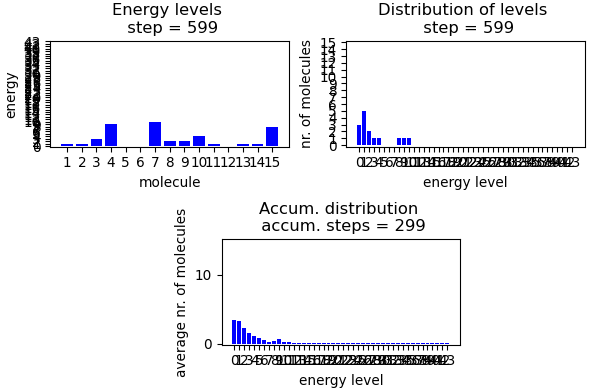

In [28]:
#run short simulation
%matplotlib notebook

nop = 15 ##user input

#initialize
istep = 0
nstot = 40*nop
nseqv = 20*nop

if istep <= nseqv:
    
    #automatic generation of levels
    levels = generate_levels(2, nop)
    maxlev, idist, dist_sum, nstep = setzero(levels)
    
print(levels)
      
#prepare graphs
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5)
ax1 = fig.add_subplot(gs[0, :2], )
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])
all_levels = []
all_distr = []
all_dist_sum = []

zero_array = []

for i in range(int(sum(levels))+1):
    zero_array.append(0.05)

#run
while istep < nstot:
    
    bef = istep
    
    #get random molecules
    ifrom, ito = getrand(nop)
    
    #exchange and update max levels
    levels, istep = exchange(ifrom, ito, nop, levels, istep, maxlev)
    
    if istep > bef: #exchange not possible sometimes (level[ifrom] = 0)
        
        #calculate distribution over energy levels
        distr, all_levels, all_distr = recdist(nop, levels, maxlev, all_levels, all_distr)
    
        #calculate accumulated distribution
        if istep > nseqv: #if equilibrated
            
            idist, dist_sum, all_dist_sum, nstep = accum(nop, maxlev, idist, distr, dist_sum, nstep, all_dist_sum) 
            nstep+=1
            
        else:
            
            all_dist_sum.append(zero_array)

#animate plot data
def animation_frame(i):
    ax1.cla()

    labels1 = np.arange(1, nop+1, 1)
    trimmed_dist1 = all_levels[i]

    ax1.set_xticks(labels1)
    ax1.set_yticks(np.arange(0, maxlev, 1))
    ax1.set_xlabel('molecule')
    ax1.set_ylabel('energy')
    ax1.set_ylim(-0.2, maxlev-1+0.2)
    ax1.bar(x=labels1, height=trimmed_dist1, color='b')
    ax1.set_title(f'Energy levels \n step = {i}')

    ax2.cla()

    labels2 = np.arange(0, maxlev, 1)
    trimmed_dist2 = all_distr[i]
    ax2.set_xticks(labels2)
    ax2.set_yticks(np.arange(0, nop+1, 1))
    ax2.set_ylabel('nr. of molecules')
    ax2.set_xlabel('energy level')
    ax2.set_ylim(-0.2, nop+0.2)
    ax2.bar(x=labels2, height=trimmed_dist2, color='b')
    ax2.set_title(f'Distribution of levels \n step = {i}')

    ax3.cla()

    labels3 = np.arange(0, maxlev, 1)
    trimmed_dist3 = all_dist_sum[i]
    ax3.set_xticks(labels3)
    ax3.set_ylabel('average nr. of molecules')
    ax3.set_xlabel('energy level')
    ax3.set_ylim(-0.2, nop+0.2)
    ax3.bar(x=labels3, height=trimmed_dist3, color='b')
    if i > nseqv:
        ax3.set_title(f'Accum. distribution \n accum. steps = {i-nseqv}')
    else:
        ax3.set_title(f'Accum. distribution \n accum. steps = 0')

    plt.tight_layout()

frames_no = len(all_levels)
animation = FuncAnimation(fig, animation_frame, frames=frames_no, interval=50, repeat=False)

In [29]:
calc_Eav(maxlev, distr, nop)

Average energy: 28.4724e-21 J


3.6242 red.un. 2607.1751 K
Average energy: 31.2579e-21 J


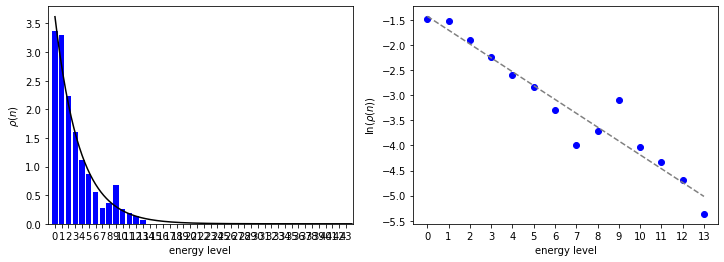

In [30]:
%matplotlib inline
calc_prob_temp(dist_sum, nop)

In [31]:
calc_Bolt_ent(nop, distr)

Statistical weight: 908107200.0
Boltzmann entropy: 0.2848e-21 J/K


In [32]:
calc_av_ent(nop, dist_sum)

Statistical weight: 132723038219088.1
Average entropy: 0.4490e-21 J/K
